In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
old_yeast_tada_preds = pd.read_csv("../output/yeast_TFs_preds/tada/yeast_TF/tada_preds.csv", index_col = 0)
old_yeast_tada_preds

FileNotFoundError: [Errno 2] No such file or directory: '../output/yeast_TFs_preds/tada/yeast_TF/tada_preds.csv'

In [37]:
# new_yeast_tada_preds = pd.read_csv("../output/tada_pa_fix_yeast/TADA_preds.csv")
new_yeast_tada_preds = pd.read_csv("../output/tada_test_long/TADA_preds.csv")
#new_yeast_tada_preds = new_yeast_tada_preds.rename(columns = {"sequences" : "sequence", "preds" : "tada_preds"})
new_yeast_tada_preds

,Unnamed: 0,sequence,tada_centers,tada_preds
0,0,MSMFNALNSNIEGEQYEAEEHSRELQIEQSFNILQDALIDLKNKDF...,"20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,2...","0.5416591,0.58181286,0.53811306,0.48759672,0.4..."
1,1,MAEQTLLSKLNALSQKVIPPASPSQASILTEEVIRNWPERSKTLCS...,"20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,2...","0.19581681,0.19516133,0.16464446,0.16565555,0...."


In [38]:
def activity_string_to_array(prob_string, delim = ","):
    a = prob_string.replace('\n','')
    a = a.replace('[','')
    a = a.replace(']','').split(delim)
    b = []
    for x in a:
        if x != "":
            b.append(float(x))
    return b


In [39]:
merged = pd.merge(old_yeast_tada_preds, new_yeast_tada_preds, on = 'sequence', suffixes = ("_old", "_new")).drop_duplicates()
merged

,sequence,tada_centers_old,tada_preds_old,Unnamed: 0,tada_centers_new,tada_preds_new
0,MSMFNALNSNIEGEQYEAEEHSRELQIEQSFNILQDALIDLKNKDF...,"[20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....","[0.5227414965629578, 0.5669170022010803, 0.523...",0,"20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,2...","0.5416591,0.58181286,0.53811306,0.48759672,0.4..."
1,MAEQTLLSKLNALSQKVIPPASPSQASILTEEVIRNWPERSKTLCS...,"[20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....","[0.1889198273420334, 0.18778686225414276, 0.16...",1,"20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,2...","0.19581681,0.19516133,0.16464446,0.16565555,0...."


In [41]:
float_preds = []

for str_list in merged["tada_preds_new"]:
    # if "..." in str_list:
    #     float_preds.append(None)
    # else:
        float_preds.append(activity_string_to_array(str_list, delim = ","))
merged["tada_preds_new"] = float_preds

float_preds = []
for str_list in merged["tada_preds_old"]:
    if "..." in str_list:
        float_preds.append(None)
    else:
        float_preds.append(activity_string_to_array(str_list, delim = ","))
merged["tada_preds_old"] = float_preds
merged

,sequence,tada_centers_old,tada_preds_old,Unnamed: 0,tada_centers_new,tada_preds_new
0,MSMFNALNSNIEGEQYEAEEHSRELQIEQSFNILQDALIDLKNKDF...,"[20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....","[0.5227414965629578, 0.5669170022010803, 0.523...",0,"20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,2...","[0.5416591, 0.58181286, 0.53811306, 0.48759672..."
1,MAEQTLLSKLNALSQKVIPPASPSQASILTEEVIRNWPERSKTLCS...,"[20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....","[0.1889198273420334, 0.18778686225414276, 0.16...",1,"20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,2...","[0.19581681, 0.19516133, 0.16464446, 0.1656555..."


In [42]:
merged = merged.dropna()
merged

,sequence,tada_centers_old,tada_preds_old,Unnamed: 0,tada_centers_new,tada_preds_new
0,MSMFNALNSNIEGEQYEAEEHSRELQIEQSFNILQDALIDLKNKDF...,"[20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....","[0.5227414965629578, 0.5669170022010803, 0.523...",0,"20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,2...","[0.5416591, 0.58181286, 0.53811306, 0.48759672..."
1,MAEQTLLSKLNALSQKVIPPASPSQASILTEEVIRNWPERSKTLCS...,"[20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....","[0.1889198273420334, 0.18778686225414276, 0.16...",1,"20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,2...","[0.19581681, 0.19516133, 0.16464446, 0.1656555..."


In [43]:
expanded = merged.explode(["tada_preds_old", "tada_preds_new"])
expanded

,sequence,tada_centers_old,tada_preds_old,Unnamed: 0,tada_centers_new,tada_preds_new
0,MSMFNALNSNIEGEQYEAEEHSRELQIEQSFNILQDALIDLKNKDF...,"[20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....",0.522741,0,"20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,2...",0.541659
0,MSMFNALNSNIEGEQYEAEEHSRELQIEQSFNILQDALIDLKNKDF...,"[20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....",0.566917,0,"20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,2...",0.581813
0,MSMFNALNSNIEGEQYEAEEHSRELQIEQSFNILQDALIDLKNKDF...,"[20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....",0.523134,0,"20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,2...",0.538113
0,MSMFNALNSNIEGEQYEAEEHSRELQIEQSFNILQDALIDLKNKDF...,"[20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....",0.472877,0,"20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,2...",0.487597
0,MSMFNALNSNIEGEQYEAEEHSRELQIEQSFNILQDALIDLKNKDF...,"[20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....",0.439718,0,"20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,2...",0.457323
...,...,...,...,...,...,...
1,MAEQTLLSKLNALSQKVIPPASPSQASILTEEVIRNWPERSKTLCS...,"[20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....",0.157748,1,"20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,2...",0.158528
1,MAEQTLLSKLNALSQKVIPPASPSQASILTEEVIRNWPERSKTLCS...,"[20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....",0.152022,1,"20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,2...",0.152111
1,MAEQTLLSKLNALSQKVIPPASPSQASILTEEVIRNWPERSKTLCS...,"[20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....",0.154828,1,"20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,2...",0.154984
1,MAEQTLLSKLNALSQKVIPPASPSQASILTEEVIRNWPERSKTLCS...,"[20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27....",0.158466,1,"20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,28.0,2...",0.15868


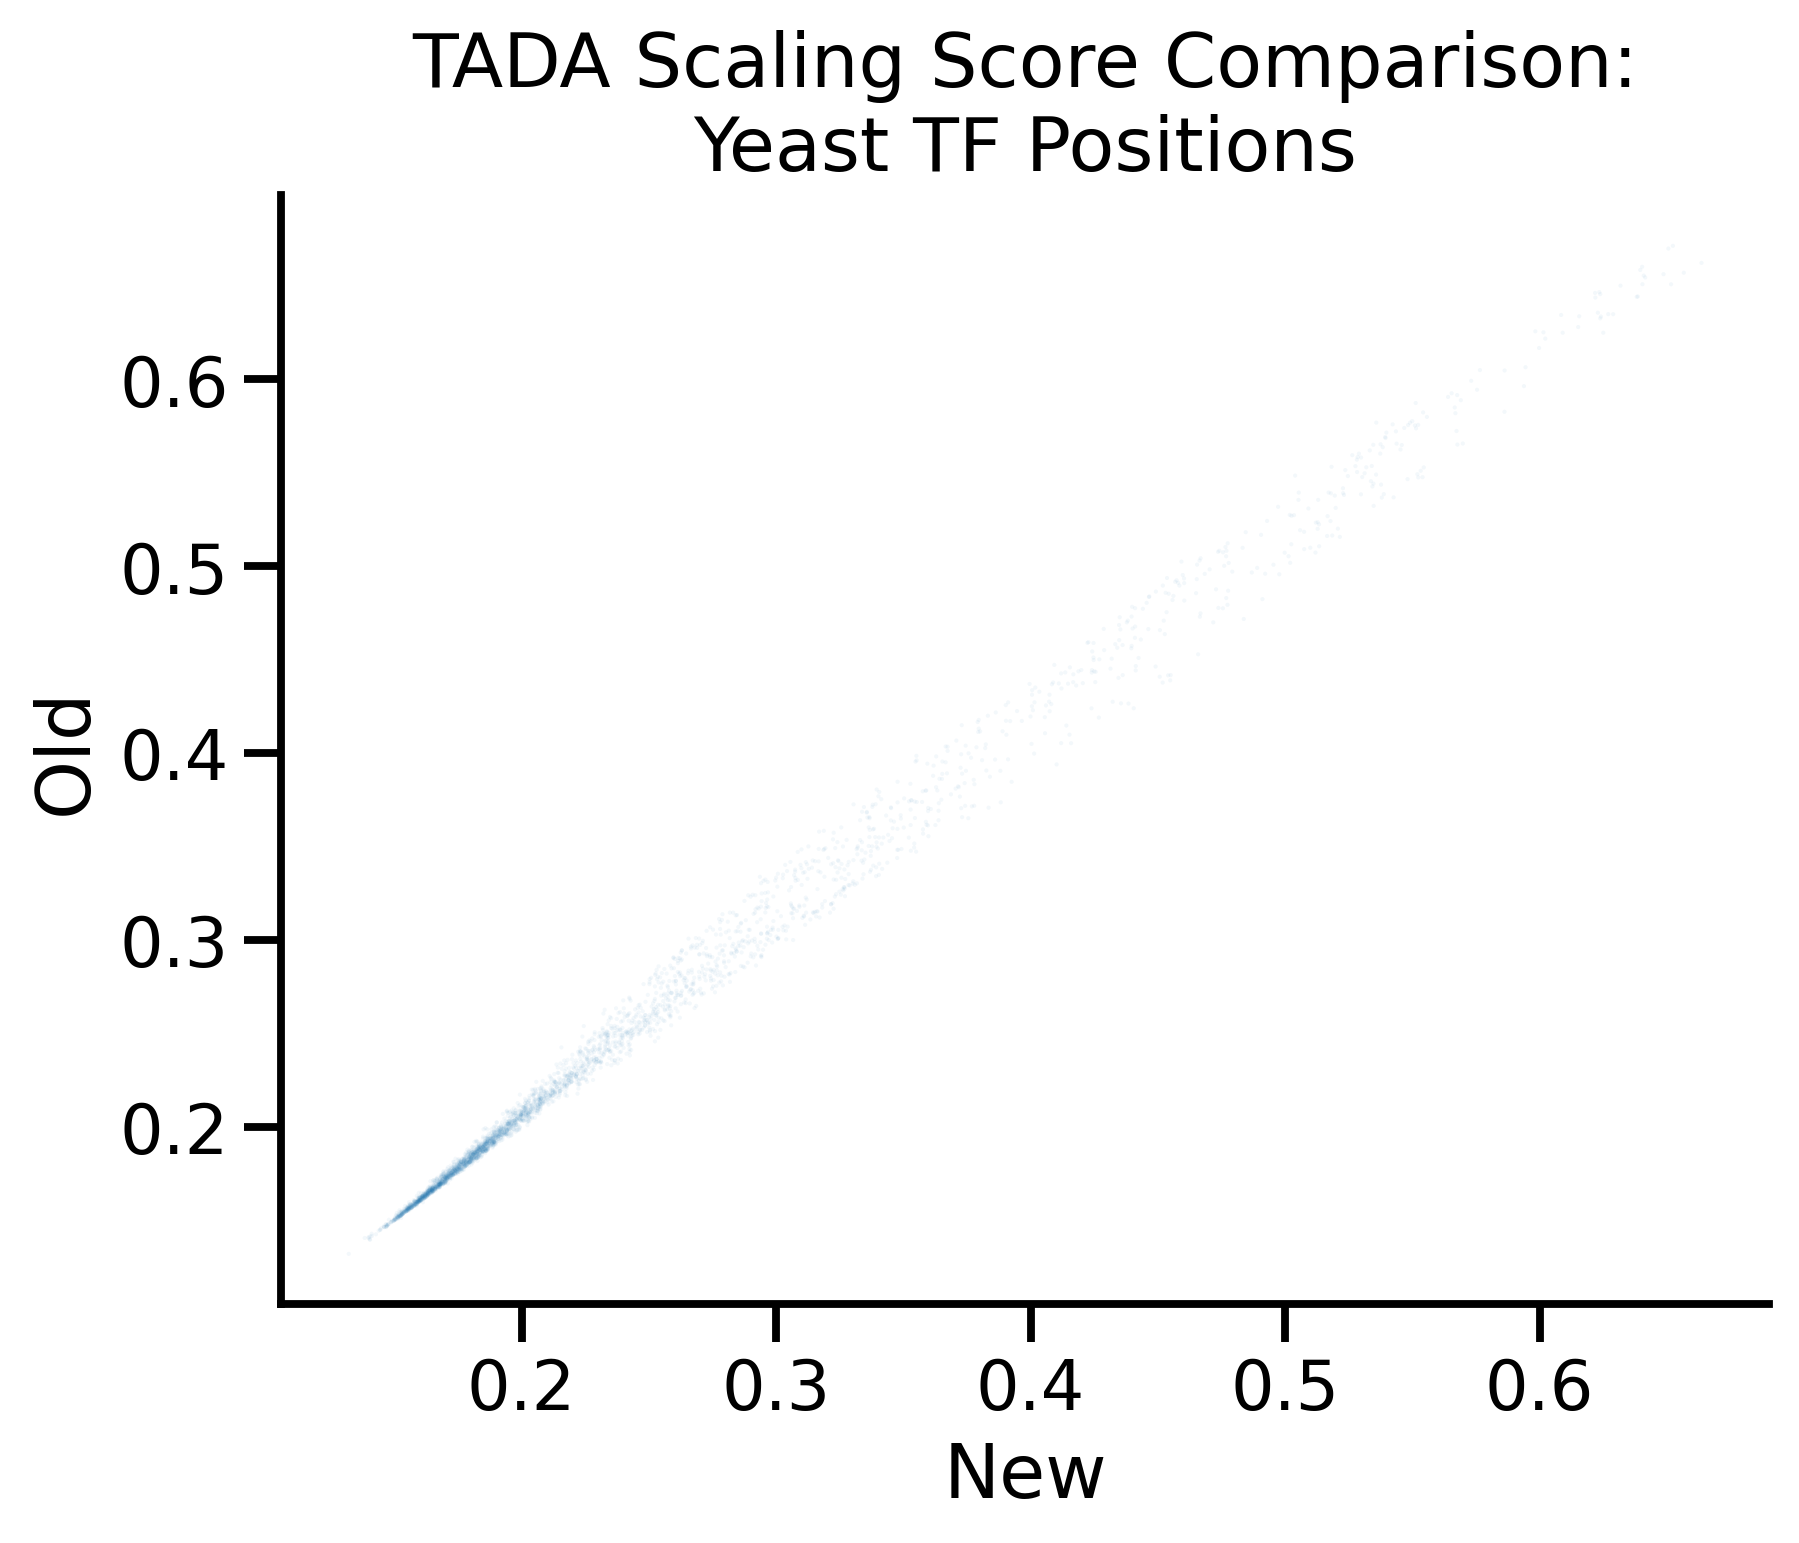

In [44]:
sns.set_context('talk')

plt.figure(dpi = 300)
sns.scatterplot(data = expanded, x = "tada_preds_old", y = "tada_preds_new", alpha = 0.05, 
                edgecolor = 'none', s = 1)
plt.title("TADA Scaling Score Comparison:\nYeast TF Positions")
plt.xlabel("New")
plt.ylabel("Old")
sns.despine()